In [55]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [57]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [59]:
import numpy as np




In [60]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras.utils as tku


# IMAGE PREPROCESSING

In [62]:
train_data_gen=ImageDataGenerator( shear_range=0.2,
                            zoom_range=0.2,
                            rescale=1./255,
                            horizontal_flip=True)
training_set=train_data_gen.flow_from_directory('Datasets/Handwritten digits/MNIST/training_set',
                                          target_size = (28,28),
                                          batch_size = 32,
                                          class_mode='categorical'
                                                
                                         )

Found 37340 images belonging to 10 classes.


In [63]:
test_data_gen=ImageDataGenerator( shear_range=0.2,
                            zoom_range=0.2,
                            rescale=1./255,
                            horizontal_flip=True)
testing_set=test_data_gen.flow_from_directory('Datasets/Handwritten digits/MNIST/test_set',
                                          target_size = (28,28),
                                          batch_size = 32,
                                          class_mode='categorical'
                                         )

Found 4660 images belonging to 10 classes.






































# Building CNN Model

# Initialising

In [64]:
cnn=tf.keras.models.Sequential()

# first convolutional layer

In [65]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,3]))

# pooling layer

In [66]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# second convolutional layer

In [67]:

# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

In [68]:
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

## Flatenning layer

In [69]:
cnn.add(tf.keras.layers.Flatten())

# Full Connection

In [70]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

# Output Layer

In [71]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

# compiling the CNN

In [72]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
trained_model=cnn.fit(x=training_set,validation_data=testing_set,epochs=1)

1167/1167 [==============================] - 68s 58ms/step - loss: 0.4088 - accuracy: 0.8702 - val_loss: 0.2580 - val_accuracy: 0.9197


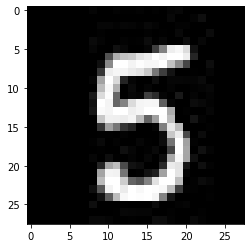

In [74]:
test_image=tku.load_img('Datasets/Handwritten digits/MNIST/single_prediction/img_11.jpg',target_size=(28,28))
plt.imshow(test_image)

In [75]:
test_image=tku.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
results=(cnn.predict(test_image))
training_set.class_indices
if results[0][0] == 1:
    prediction='Zero'
elif results[0][1] == 1:
    prediction='One'
elif results[0][2] == 1:
    prediction='Two'
elif results[0][3] == 1:
    prediction='Three'
elif results[0][4] == 1:
    prediction='Four'
elif results[0][5] == 1:
    prediction='Five'
elif results[0][6] == 1:
    prediction='Six'
elif results[0][7] == 1:
    prediction='Seven'
elif results[0][8] == 1:
    prediction='Eighty'
else:
    prediction='Nine'

print(prediction)


1/1 [==============================] - 0s 48ms/step
Five


In [76]:
print(results) #0 1 2 3 4 5 6 7 8 9

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [77]:
print(prediction)

Five
